In [1]:
from core.preprocessing import DataManager, retrend_data
from core.problems import FunctionalRegression
from core.utilities import plot_forecasts, calc_test_mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')

In [3]:
def plot_trends_and_total(df, start=None, stop=None):
    if start is None:
        start = df.index[0]
    if stop is None:
        stop = df.index[-1]
    cols = df.columns
    fig, axes = plt.subplots(nrows=2, figsize=(12,10), sharex=True)
    df.loc[start:stop].plot(y=cols[:-1], legend=False, linewidth=1, ax=axes[0])
    df.loc[start:stop].plot(y=cols[-1], linewidth=1, ax=axes[1])

In [4]:
dm = DataManager()
dm.load_all_and_split(reindex=True)

/Users/bennetmeyers/.virtualenvs/sc/lib/python2.7/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


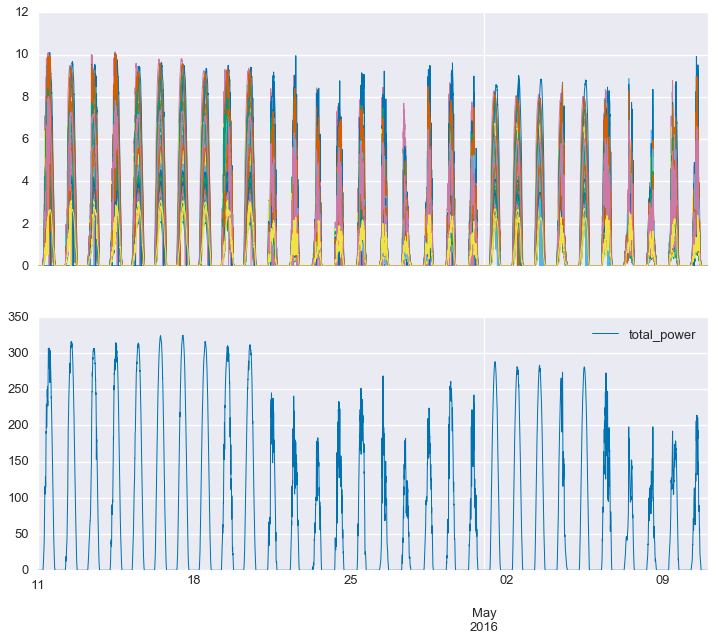

In [5]:
plot_trends_and_total(dm.original_train)

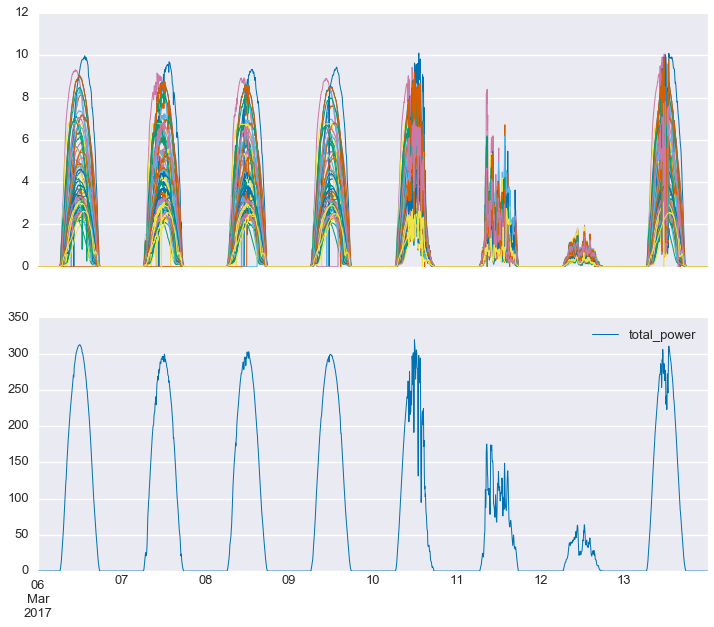

In [6]:
plot_trends_and_total(dm.original_dev)

In [7]:
funcreg = FunctionalRegression(dm.original_train, dm.original_dev)

In [8]:
ns = [1, 2, 5, 10, 20, 30, 40, 50, 75, 100]
param_search = pd.DataFrame(index=ns, columns=['mse'])
for n in ns:
    funcreg.make_forecasts(neighborhood=n)
    param_search.loc[n] = funcreg.calc_mse()

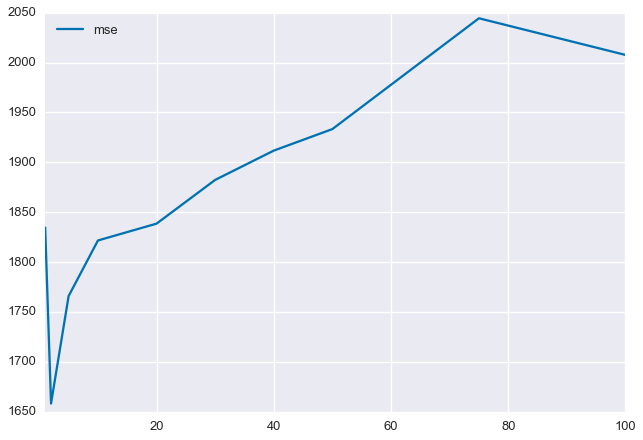

In [9]:
param_search.plot()

In [10]:
funcreg.make_forecasts(neighborhood=2)
funcreg.calc_mse()

1658.1979264816916

(24815518.75, 24821276.25)

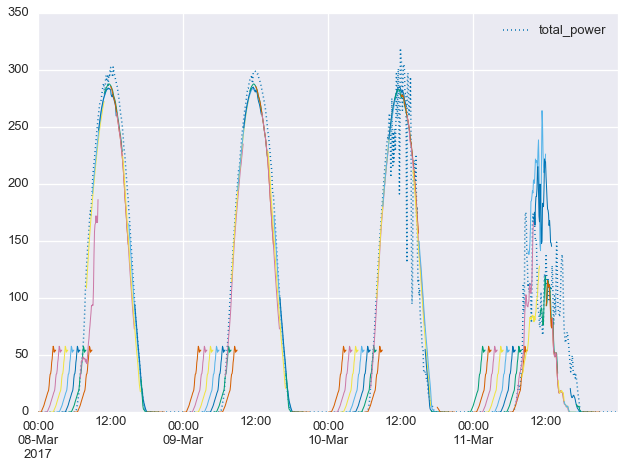

In [11]:
funcreg.plot_test()
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk
ax.set_xlim(start, end)